In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
!pip3 install -q xlrd xlwt
!pip3 install -q openpyxl
!pip3 install -q seaborn

In [6]:
fileName = 'vehicle_emission_1.xls'
rawDataset = pd.read_excel(fileName, index_col=0)
rawDataset

SN    Make    Yr FuelType  VehicleUse    CO   CO2     O2   HC  lamda  \
N                                                                              
1        1   Honda  2006   Petrol  Commercial  0.00  13.5   1.55    0   1.08   
2        2   Honda  2007   Petrol  Commercial  0.00  14.7   0.08   10   1.00   
3        3  Toyota  2011   Petrol  Commercial  0.00  14.6   0.72    1   1.04   
4        4  Toyota  1998   Petrol    Official  0.00  10.2   3.15    1   1.22   
5        5  Toyota  2002   Petrol    Official  0.00  14.5   0.60    1   1.03   
...    ...     ...   ...      ...         ...   ...   ...    ...  ...    ...   
2761  2796  Toyota  1987   Petrol     Private  4.49   5.8  11.29  603   1.51   
2762  2797  Toyota  2007   Petrol  Commercial  4.51  11.9   0.47  388   0.88   
2763  2798  Nissan  1984   Petrol     Private  4.51  10.9   1.55  203   0.93   
2764  2799  Nissan  1986   Petrol     Private  4.55   9.9   3.44  679   1.00   
2765  2800  Nissan  1989   Petrol    Official  4.65   8.3   5.61  138   1.13   

       Study   OGEPA  Age VehicleType  EUROII NESREAI     AFR NESREAII EUROIII  
N                                                                               
1     Passed  Passed    8         Car  Passed  Passed  15.876   Passed  Passed  
2     Passed  Passed    7        Jeep  Passed  Passed  14.744   Passed  Passed  
3     Passed  Passed    3         Car  Passed  Passed  15.244   Passed  Passed  
4     Passed  Passed   16         Car  Passed  Passed  17.934   Passed  Passed  
5     Passed  Passed   12         Car  Passed  Passed  15.141   Passed  Passed  
...      ...     ...  ...         ...     ...     ...     ...      ...     ...  
2761  Failed  Failed   27         Car  Failed  Failed  22.256   Passed  Failed  
2762  Failed  Failed    7         Car  Failed  Failed  12.995   Failed  Failed  
2763  Failed  Failed   30         Car  Failed  Failed  13.700   Failed  Failed  
2764  Failed  Failed   28         Car  Failed  Failed  14.627   Failed  Failed  
2765  Failed  Failed   25         Car  Failed  Failed  16.611   Failed  Failed  

[2765 rows x 19 columns]

In [7]:
rawDataset.columns

Index(['SN', 'Make', 'Yr', 'FuelType', 'VehicleUse', 'CO', 'CO2', 'O2', 'HC',
       'lamda', 'Study', 'OGEPA', 'Age', 'VehicleType', 'EUROII', 'NESREAI',
       'AFR', 'NESREAII', 'EUROIII'],
      dtype='object')

In [19]:
prefix = ['Make', 'FuelType', 'VehicleUse', 'Study', 'OGEPA', 'VehicleType', 'EUROII', 'NESREAI', 'NESREAII', 'EUROIII']

dataset = rawDataset[::25].copy()

for col in prefix:
    dict_colData = {x:i+1 for i,x in enumerate(rawDataset[col].unique())}
    print(dict_colData)
    dataset[col + '_N'] = dataset[col].map(dict_colData)
    
# dataset = pd.get_dummies(dataset, prefix=prefix, prefix_sep='_')
dataset

{'Honda': 1, 'Toyota': 2, 'Nissan': 3, 'Volkswagen': 4, 'Mazda': 5, 'Mitsubushi': 6, 'Mercedez B': 7, 'Peugeot': 8}
{'Petrol': 1}
{'Commercial': 1, 'Official': 2, 'Private': 3}
{'Passed': 1, 'Failed': 2}
{'Passed': 1, 'Failed': 2}
{'Car': 1, 'Jeep': 2, 'Bus': 3, 'PICK-UP': 4, 'Bullion V': 5, 'CABSTAR': 6, 'TRUCK': 7}
{'Passed': 1, 'Failed': 2}
{'Passed': 1, 'Failed': 2}
{'Passed': 1, 'Failed': 2}
{'Passed': 1, 'Failed': 2}


SN        Make    Yr FuelType  VehicleUse    CO   CO2    O2   HC  \
N                                                                          
1        1       Honda  2006   Petrol  Commercial  0.00  13.5  1.55    0   
26      26       Honda  2009   Petrol     Private  0.00  10.6  7.39    3   
51      51      Toyota  2009   Petrol    Official  0.01  14.4  1.14    1   
76      76      Nissan  1996   Petrol     Private  0.01  14.5  0.90    1   
101    101      Nissan  2001   Petrol     Private  0.01  13.0  3.05    0   
...    ...         ...   ...      ...         ...   ...   ...   ...  ...   
2651  2686      Toyota  1998   Petrol     Private  3.25  11.8  2.30  262   
2676  2711  Mercedez B  1985   Petrol     Private  3.33   2.9  8.26   11   
2701  2736       Honda  1992   Petrol     Private  3.43  11.9  1.38  177   
2726  2761       Mazda  1998   Petrol     Private  3.74  10.1  4.12  573   
2751  2786      Toyota  1993   Petrol    Official  4.29  11.8  1.10  512   

      lamda  ... Make_N FuelType_N  VehicleUse_N Study_N OGEPA_N  \
N            ...                                                   
1      1.08  ...      1          1             1       1       1   
26     1.50  ...      1          1             3       1       1   
51     1.06  ...      2          1             2       1       1   
76     1.04  ...      3          1             3       1       1   
101    1.17  ...      3          1             3       1       1   
...     ...  ...    ...        ...           ...     ...     ...   
2651   1.00  ...      2          1             3       2       2   
2676   1.68  ...      7          1             3       2       2   
2701   0.96  ...      1          1             3       2       2   
2726   1.08  ...      5          1             3       2       2   
2751   0.91  ...      2          1             2       2       2   

     VehicleType_N  EUROII_N NESREAI_N NESREAII_N  EUROIII_N  
N                                                             
1                1         1         1          1          1  
26               1         1         1          1          1  
51               1         1         1          1          1  
76               2         1         1          1          1  
101              1         1         1          1          1  
...            ...       ...       ...        ...        ...  
2651             3         2         1          1          2  
2676             1         2         1          1          2  
2701             1         2         1          1          2  
2726             1         2         2          1          2  
2751             1         2         2          1          2  

[111 rows x 29 columns]

In [20]:
dataset = pd.get_dummies(dataset, prefix=prefix, prefix_sep='_')
dataset

SN    Yr    CO   CO2    O2   HC  lamda  Age     AFR  Make_N  ...  \
N                                                                    ...   
1        1  2006  0.00  13.5  1.55    0   1.08    8  15.876       1  ...   
26      26  2009  0.00  10.6  7.39    3   1.50    5  22.006       1  ...   
51      51  2009  0.01  14.4  1.14    1   1.06    5  15.567       2  ...   
76      76  1996  0.01  14.5  0.90    1   1.04   18  15.347       3  ...   
101    101  2001  0.01  13.0  3.05    0   1.17   13  17.199       3  ...   
...    ...   ...   ...   ...   ...  ...    ...  ...     ...     ...  ...   
2651  2686  1998  3.25  11.8  2.30  262   1.00   16  14.700       2  ...   
2676  2711  1985  3.33   2.9  8.26   11   1.68   29  24.681       7  ...   
2701  2736  1992  3.43  11.9  1.38  177   0.96   22  14.068       1  ...   
2726  2761  1998  3.74  10.1  4.12  573   1.08   16  15.891       5  ...   
2751  2786  1993  4.29  11.8  1.10  512   0.91   21  13.362       2  ...   

      VehicleType_Jeep  VehicleType_PICK-UP  EUROII_Failed  EUROII_Passed  \
N                                                                           
1                    0                    0              0              1   
26                   0                    0              0              1   
51                   0                    0              0              1   
76                   1                    0              0              1   
101                  0                    0              0              1   
...                ...                  ...            ...            ...   
2651                 0                    0              1              0   
2676                 0                    0              1              0   
2701                 0                    0              1              0   
2726                 0                    0              1              0   
2751                 0                    0              1              0   

      NESREAI_Failed  NESREAI_Passed  NESREAII_Failed  NESREAII_Passed  \
N                                                                        
1                  0               1                0                1   
26                 0               1                0                1   
51                 0               1                0                1   
76                 0               1                0                1   
101                0               1                0                1   
...              ...             ...              ...              ...   
2651               0               1                0                1   
2676               0               1                0                1   
2701               0               1                0                1   
2726               1               0                0                1   
2751               1               0                0                1   

      EUROIII_Failed  EUROIII_Passed  
N                                     
1                  0               1  
26                 0               1  
51                 0               1  
76                 0               1  
101                0               1  
...              ...             ...  
2651               1               0  
2676               1               0  
2701               1               0  
2726               1               0  
2751               1               0  

[111 rows x 46 columns]

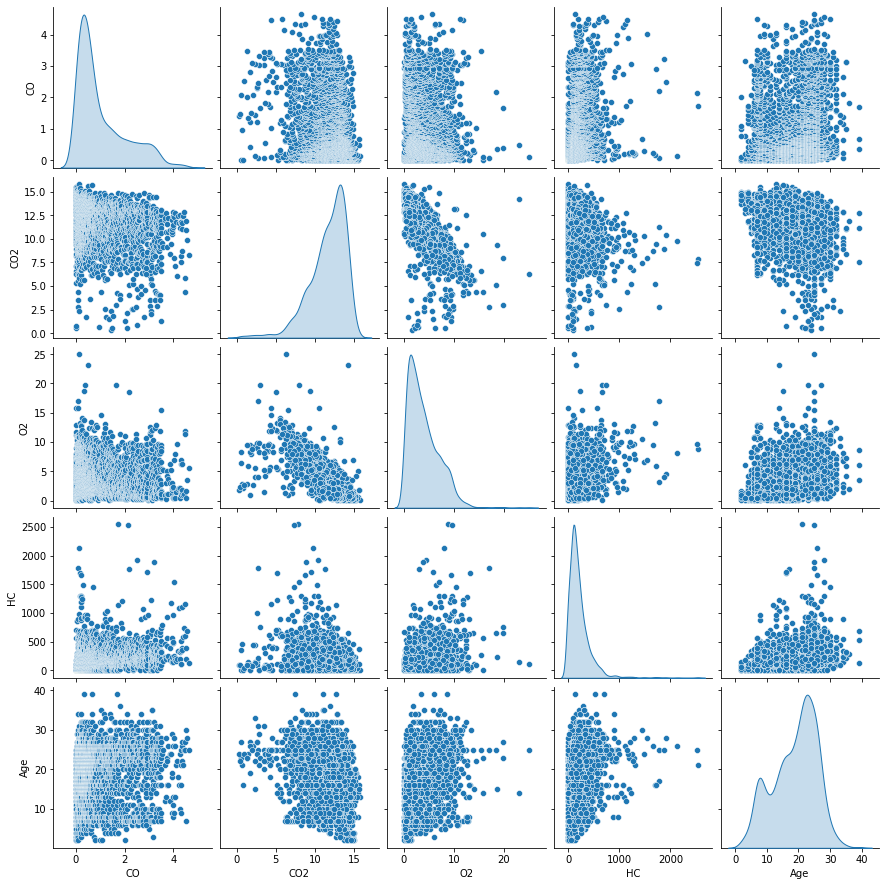

In [21]:
sns.pairplot(rawDataset[['CO', 'CO2', 'O2', 'HC', 'Age']], diag_kind='kde')

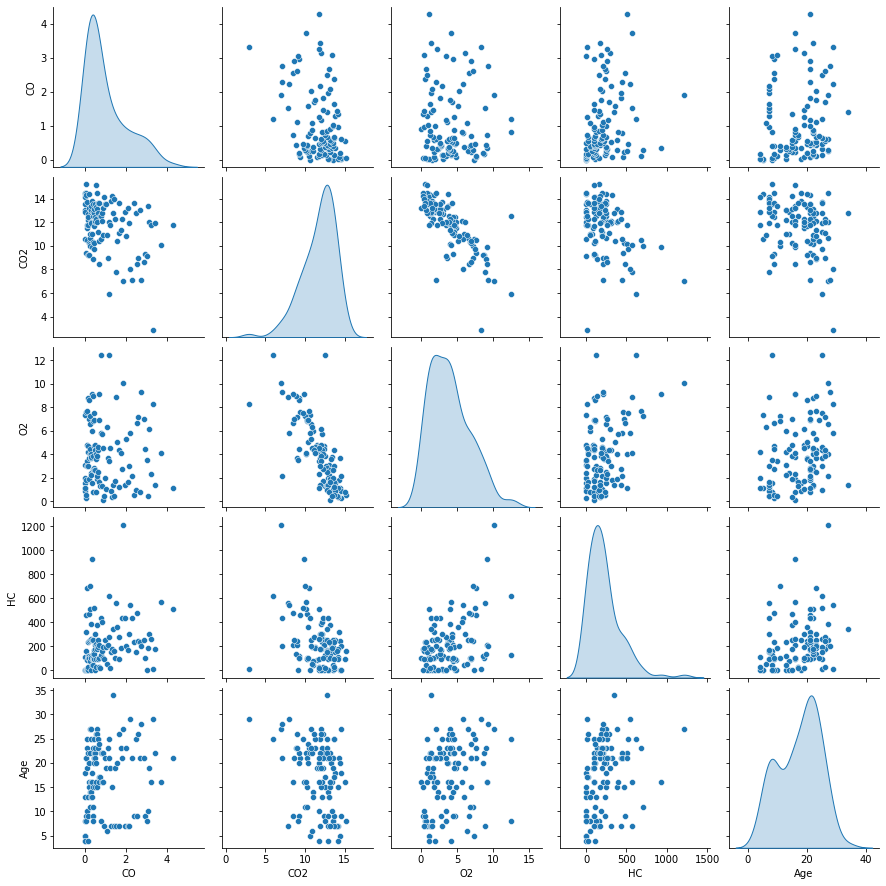

In [22]:
sns.pairplot(dataset[['CO', 'CO2', 'O2', 'HC', 'Age']], diag_kind='kde')

In [23]:
from sklearn.preprocessing import StandardScaler

data = dataset[['Age','CO','CO2','O2','HC']].to_numpy()

scaler = StandardScaler()
print(scaler.fit(data))
print(scaler.mean_)

data_normalized = scaler.transform(data)

df2 = pd.DataFrame(data_normalized)

# start index
df2.index += 1
df2.columns = ['Age_S','CO_S','CO2_S','O2_S','HC_S']
dataset = pd.concat([dataset, df2], axis=1)

dataset

StandardScaler()
[ 17.35135135   1.03072072  11.70828829   4.02297297 220.54054054]


SN      Yr    CO   CO2    O2     HC  lamda   Age     AFR  Make_N  \
1        1.0  2006.0  0.00  13.5  1.55    0.0   1.08   8.0  15.876     1.0   
2        NaN     NaN   NaN   NaN   NaN    NaN    NaN   NaN     NaN     NaN   
3        NaN     NaN   NaN   NaN   NaN    NaN    NaN   NaN     NaN     NaN   
4        NaN     NaN   NaN   NaN   NaN    NaN    NaN   NaN     NaN     NaN   
5        NaN     NaN   NaN   NaN   NaN    NaN    NaN   NaN     NaN     NaN   
...      ...     ...   ...   ...   ...    ...    ...   ...     ...     ...   
2651  2686.0  1998.0  3.25  11.8  2.30  262.0   1.00  16.0  14.700     2.0   
2676  2711.0  1985.0  3.33   2.9  8.26   11.0   1.68  29.0  24.681     7.0   
2701  2736.0  1992.0  3.43  11.9  1.38  177.0   0.96  22.0  14.068     1.0   
2726  2761.0  1998.0  3.74  10.1  4.12  573.0   1.08  16.0  15.891     5.0   
2751  2786.0  1993.0  4.29  11.8  1.10  512.0   0.91  21.0  13.362     2.0   

      ...  NESREAI_Passed  NESREAII_Failed  NESREAII_Passed  EUROIII_Failed  \
1     ...             1.0              0.0              1.0             0.0   
2     ...             NaN              NaN              NaN             NaN   
3     ...             NaN              NaN              NaN             NaN   
4     ...             NaN              NaN              NaN             NaN   
5     ...             NaN              NaN              NaN             NaN   
...   ...             ...              ...              ...             ...   
2651  ...             1.0              0.0              1.0             1.0   
2676  ...             1.0              0.0              1.0             1.0   
2701  ...             1.0              0.0              1.0             1.0   
2726  ...             0.0              0.0              1.0             1.0   
2751  ...             0.0              0.0              1.0             1.0   

      EUROIII_Passed     Age_S      CO_S     CO2_S      O2_S      HC_S  
1                1.0 -1.337347 -1.016650  0.845706 -0.893044 -1.086652  
2                NaN -1.766380 -1.016650 -0.523123  1.215907 -1.071870  
3                NaN -1.766380 -1.006787  1.270516 -1.041104 -1.081725  
4                NaN  0.092764 -1.006787  1.317717 -1.127774 -1.081725  
5                NaN -0.622291 -1.006787  0.609701 -0.351362 -1.086652  
...              ...       ...       ...       ...       ...       ...  
2651             0.0       NaN       NaN       NaN       NaN       NaN  
2676             0.0       NaN       NaN       NaN       NaN       NaN  
2701             0.0       NaN       NaN       NaN       NaN       NaN  
2726             0.0       NaN       NaN       NaN       NaN       NaN  
2751             0.0       NaN       NaN       NaN       NaN       NaN  

[217 rows x 51 columns]

In [24]:
from sklearn.preprocessing import MinMaxScaler

data = dataset[['Age','CO','CO2','O2','HC']].to_numpy()

scaler = MinMaxScaler()
print(scaler.fit(data))
print((scaler.data_min_, scaler.data_max_))

data_normalized = scaler.transform(data)

df2 = pd.DataFrame(data_normalized)

# start index
df2.index += 1
df2.columns = ['Age_X','CO_X','CO2_X','O2_X','HC_X']
dataset = pd.concat([dataset, df2], axis=1)

dataset

MinMaxScaler()
(array([4. , 0. , 2.9, 0.1, 0. ]), array([  34.  ,    4.29,   15.2 ,   12.5 , 1214.  ]))


SN      Yr    CO   CO2    O2     HC  lamda   Age     AFR  Make_N  \
1        1.0  2006.0  0.00  13.5  1.55    0.0   1.08   8.0  15.876     1.0   
2        NaN     NaN   NaN   NaN   NaN    NaN    NaN   NaN     NaN     NaN   
3        NaN     NaN   NaN   NaN   NaN    NaN    NaN   NaN     NaN     NaN   
4        NaN     NaN   NaN   NaN   NaN    NaN    NaN   NaN     NaN     NaN   
5        NaN     NaN   NaN   NaN   NaN    NaN    NaN   NaN     NaN     NaN   
...      ...     ...   ...   ...   ...    ...    ...   ...     ...     ...   
2651  2686.0  1998.0  3.25  11.8  2.30  262.0   1.00  16.0  14.700     2.0   
2676  2711.0  1985.0  3.33   2.9  8.26   11.0   1.68  29.0  24.681     7.0   
2701  2736.0  1992.0  3.43  11.9  1.38  177.0   0.96  22.0  14.068     1.0   
2726  2761.0  1998.0  3.74  10.1  4.12  573.0   1.08  16.0  15.891     5.0   
2751  2786.0  1993.0  4.29  11.8  1.10  512.0   0.91  21.0  13.362     2.0   

      ...     Age_S      CO_S     CO2_S      O2_S      HC_S     Age_X  CO_X  \
1     ... -1.337347 -1.016650  0.845706 -0.893044 -1.086652  0.133333   0.0   
2     ... -1.766380 -1.016650 -0.523123  1.215907 -1.071870       NaN   NaN   
3     ... -1.766380 -1.006787  1.270516 -1.041104 -1.081725       NaN   NaN   
4     ...  0.092764 -1.006787  1.317717 -1.127774 -1.081725       NaN   NaN   
5     ... -0.622291 -1.006787  0.609701 -0.351362 -1.086652       NaN   NaN   
...   ...       ...       ...       ...       ...       ...       ...   ...   
2651  ...       NaN       NaN       NaN       NaN       NaN       NaN   NaN   
2676  ...       NaN       NaN       NaN       NaN       NaN       NaN   NaN   
2701  ...       NaN       NaN       NaN       NaN       NaN       NaN   NaN   
2726  ...       NaN       NaN       NaN       NaN       NaN       NaN   NaN   
2751  ...       NaN       NaN       NaN       NaN       NaN       NaN   NaN   

         CO2_X      O2_X  HC_X  
1     0.861789  0.116935   0.0  
2          NaN       NaN   NaN  
3          NaN       NaN   NaN  
4          NaN       NaN   NaN  
5          NaN       NaN   NaN  
...        ...       ...   ...  
2651       NaN       NaN   NaN  
2676       NaN       NaN   NaN  
2701       NaN       NaN   NaN  
2726       NaN       NaN   NaN  
2751       NaN       NaN   NaN  

[319 rows x 56 columns]

In [25]:
import sklearn.preprocessing as preprocessing

X = dataset[['Age','CO','CO2','O2','HC']].to_numpy()
X_normalized = preprocessing.normalize(X, norm='l2')
# 
df2 = pd.DataFrame(X_normalized)
# start index
df2.index += 1
df2.columns = ['Age_A','CO_A','CO2_A','O2_A','HC_A']
dataset = pd.concat([dataset, df2], axis=1)

dataset

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [26]:
import sklearn.preprocessing as preprocessing

X = dataset[['Age','CO','CO2','O2','HC']].to_numpy().T
X_normalized = preprocessing.normalize(X, norm='l2')
# 
df2 = pd.DataFrame(X_normalized.T)
# start index
df2.index += 1
df2.columns = ['Age_N','CO_N','CO2_N','O2_N','HC_N']
dataset = pd.concat([dataset, df2], axis=1)

dataset

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

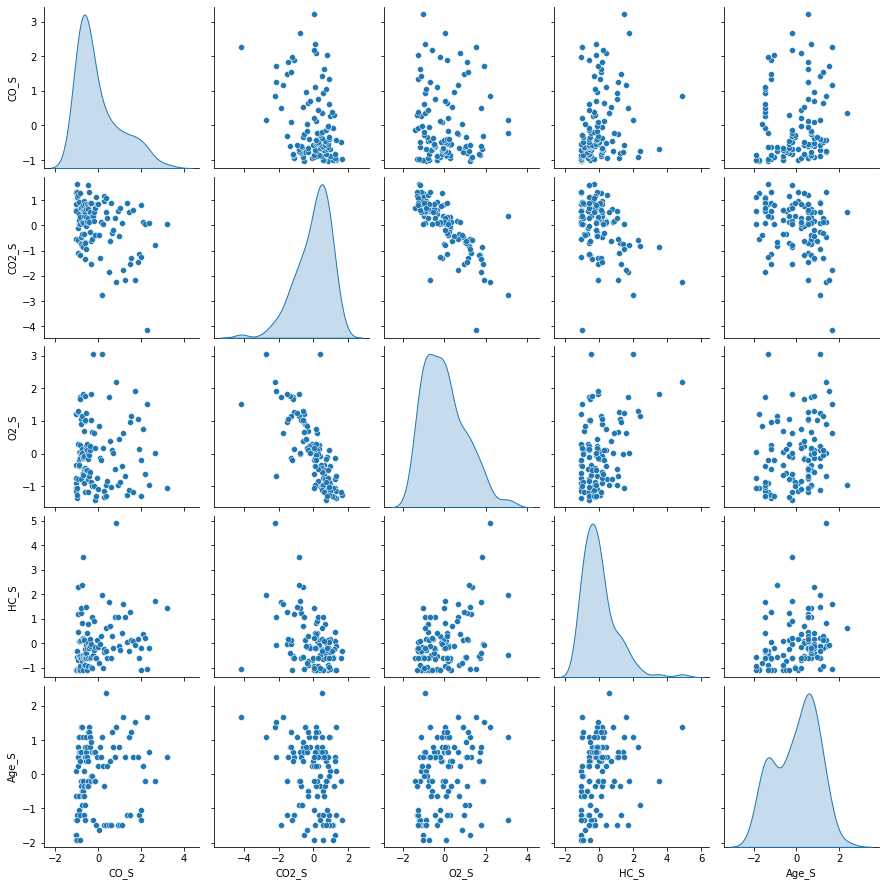

In [27]:
sns.pairplot(dataset[['CO_S', 'CO2_S', 'O2_S', 'HC_S', 'Age_S']], diag_kind='kde')

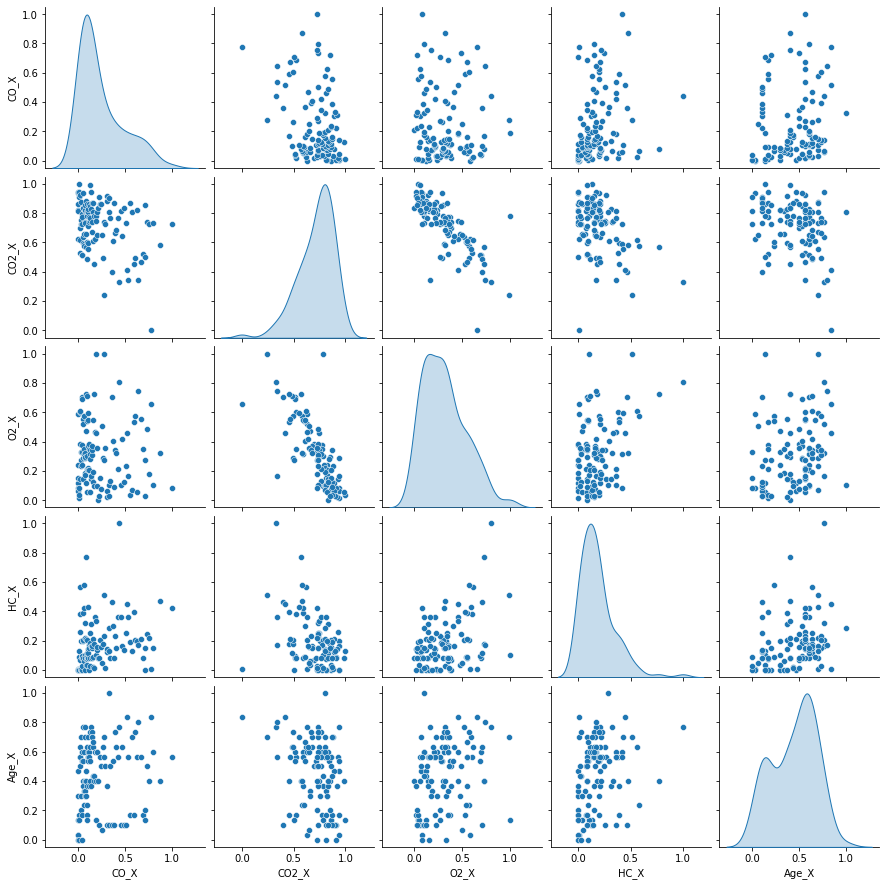

In [28]:
sns.pairplot(dataset[['CO_X', 'CO2_X', 'O2_X', 'HC_X', 'Age_X']], diag_kind='kde')

In [29]:
sns.pairplot(dataset[['CO_A', 'CO2_A', 'O2_A', 'HC_A', 'Age_A']], diag_kind='kde')

KeyError: "None of [Index(['CO_A', 'CO2_A', 'O2_A', 'HC_A', 'Age_A'], dtype='object')] are in the [columns]"

In [30]:
sns.pairplot(dataset[['CO_N', 'CO2_N', 'O2_N', 'HC_N', 'Age_N']], diag_kind='kde')

KeyError: "None of [Index(['CO_N', 'CO2_N', 'O2_N', 'HC_N', 'Age_N'], dtype='object')] are in the [columns]"

In [31]:
dataset

SN      Yr    CO   CO2    O2     HC  lamda   Age     AFR  Make_N  \
1        1.0  2006.0  0.00  13.5  1.55    0.0   1.08   8.0  15.876     1.0   
2        NaN     NaN   NaN   NaN   NaN    NaN    NaN   NaN     NaN     NaN   
3        NaN     NaN   NaN   NaN   NaN    NaN    NaN   NaN     NaN     NaN   
4        NaN     NaN   NaN   NaN   NaN    NaN    NaN   NaN     NaN     NaN   
5        NaN     NaN   NaN   NaN   NaN    NaN    NaN   NaN     NaN     NaN   
...      ...     ...   ...   ...   ...    ...    ...   ...     ...     ...   
2651  2686.0  1998.0  3.25  11.8  2.30  262.0   1.00  16.0  14.700     2.0   
2676  2711.0  1985.0  3.33   2.9  8.26   11.0   1.68  29.0  24.681     7.0   
2701  2736.0  1992.0  3.43  11.9  1.38  177.0   0.96  22.0  14.068     1.0   
2726  2761.0  1998.0  3.74  10.1  4.12  573.0   1.08  16.0  15.891     5.0   
2751  2786.0  1993.0  4.29  11.8  1.10  512.0   0.91  21.0  13.362     2.0   

      ...     Age_S      CO_S     CO2_S      O2_S      HC_S     Age_X  CO_X  \
1     ... -1.337347 -1.016650  0.845706 -0.893044 -1.086652  0.133333   0.0   
2     ... -1.766380 -1.016650 -0.523123  1.215907 -1.071870       NaN   NaN   
3     ... -1.766380 -1.006787  1.270516 -1.041104 -1.081725       NaN   NaN   
4     ...  0.092764 -1.006787  1.317717 -1.127774 -1.081725       NaN   NaN   
5     ... -0.622291 -1.006787  0.609701 -0.351362 -1.086652       NaN   NaN   
...   ...       ...       ...       ...       ...       ...       ...   ...   
2651  ...       NaN       NaN       NaN       NaN       NaN       NaN   NaN   
2676  ...       NaN       NaN       NaN       NaN       NaN       NaN   NaN   
2701  ...       NaN       NaN       NaN       NaN       NaN       NaN   NaN   
2726  ...       NaN       NaN       NaN       NaN       NaN       NaN   NaN   
2751  ...       NaN       NaN       NaN       NaN       NaN       NaN   NaN   

         CO2_X      O2_X  HC_X  
1     0.861789  0.116935   0.0  
2          NaN       NaN   NaN  
3          NaN       NaN   NaN  
4          NaN       NaN   NaN  
5          NaN       NaN   NaN  
...        ...       ...   ...  
2651       NaN       NaN   NaN  
2676       NaN       NaN   NaN  
2701       NaN       NaN   NaN  
2726       NaN       NaN   NaN  
2751       NaN       NaN   NaN  

[319 rows x 56 columns]

In [17]:
dataset.columns

Index(['SN', 'Yr', 'CO', 'CO2', 'O2', 'HC', 'lamda', 'Age', 'AFR', 'Make_N',
       'FuelType_N', 'VehicleUse_N', 'Study_N', 'OGEPA_N', 'VehicleType_N',
       'EUROII_N', 'NESREAI_N', 'NESREAII_N', 'EUROIII_N', 'Make_Honda',
       'Make_Mazda', 'Make_Mercedez B', 'Make_Mitsubushi', 'Make_Nissan',
       'Make_Peugeot', 'Make_Toyota', 'Make_Volkswagen', 'FuelType_Petrol',
       'VehicleUse_Commercial', 'VehicleUse_Official', 'VehicleUse_Private',
       'Study_Failed', 'Study_Passed', 'OGEPA_Failed', 'OGEPA_Passed',
       'VehicleType_Bullion V', 'VehicleType_Bus', 'VehicleType_CABSTAR',
       'VehicleType_Car', 'VehicleType_Jeep', 'VehicleType_PICK-UP',
       'VehicleType_TRUCK', 'EUROII_Failed', 'EUROII_Passed', 'NESREAI_Failed',
       'NESREAI_Passed', 'NESREAII_Failed', 'NESREAII_Passed',
       'EUROIII_Failed', 'EUROIII_Passed', 'Age_S', 'CO_S', 'CO2_S', 'O2_S',
       'HC_S', 'Age_X', 'CO_X', 'CO2_X', 'O2_X', 'HC_X', 'Age_A', 'CO_A',
       'CO2_A', 'O2_A', 'HC_A', 'Age_N'

In [18]:
rawDataset.columns

Index(['SN', 'Make', 'Yr', 'FuelType', 'VehicleUse', 'CO', 'CO2', 'O2', 'HC',
       'lamda', 'Study', 'OGEPA', 'Age', 'VehicleType', 'EUROII', 'NESREAI',
       'AFR', 'NESREAII', 'EUROIII'],
      dtype='object')

In [19]:
dataset.iloc[:,9:].columns

Index(['Make_N', 'FuelType_N', 'VehicleUse_N', 'Study_N', 'OGEPA_N',
       'VehicleType_N', 'EUROII_N', 'NESREAI_N', 'NESREAII_N', 'EUROIII_N',
       'Make_Honda', 'Make_Mazda', 'Make_Mercedez B', 'Make_Mitsubushi',
       'Make_Nissan', 'Make_Peugeot', 'Make_Toyota', 'Make_Volkswagen',
       'FuelType_Petrol', 'VehicleUse_Commercial', 'VehicleUse_Official',
       'VehicleUse_Private', 'Study_Failed', 'Study_Passed', 'OGEPA_Failed',
       'OGEPA_Passed', 'VehicleType_Bullion V', 'VehicleType_Bus',
       'VehicleType_CABSTAR', 'VehicleType_Car', 'VehicleType_Jeep',
       'VehicleType_PICK-UP', 'VehicleType_TRUCK', 'EUROII_Failed',
       'EUROII_Passed', 'NESREAI_Failed', 'NESREAI_Passed', 'NESREAII_Failed',
       'NESREAII_Passed', 'EUROIII_Failed', 'EUROIII_Passed', 'Age_S', 'CO_S',
       'CO2_S', 'O2_S', 'HC_S', 'Age_X', 'CO_X', 'CO2_X', 'O2_X', 'HC_X',
       'Age_A', 'CO_A', 'CO2_A', 'O2_A', 'HC_A', 'Age_N', 'CO_N', 'CO2_N',
       'O2_N', 'HC_N'],
      dtype='object')

In [20]:
dataset = pd.concat([rawDataset, dataset.iloc[:,9:]], axis=1)
dataset

SN    Make    Yr FuelType  VehicleUse    CO   CO2     O2   HC  lamda  \
1        1   Honda  2006   Petrol  Commercial  0.00  13.5   1.55    0   1.08   
2        2   Honda  2007   Petrol  Commercial  0.00  14.7   0.08   10   1.00   
3        3  Toyota  2011   Petrol  Commercial  0.00  14.6   0.72    1   1.04   
4        4  Toyota  1998   Petrol    Official  0.00  10.2   3.15    1   1.22   
5        5  Toyota  2002   Petrol    Official  0.00  14.5   0.60    1   1.03   
...    ...     ...   ...      ...         ...   ...   ...    ...  ...    ...   
2761  2796  Toyota  1987   Petrol     Private  4.49   5.8  11.29  603   1.51   
2762  2797  Toyota  2007   Petrol  Commercial  4.51  11.9   0.47  388   0.88   
2763  2798  Nissan  1984   Petrol     Private  4.51  10.9   1.55  203   0.93   
2764  2799  Nissan  1986   Petrol     Private  4.55   9.9   3.44  679   1.00   
2765  2800  Nissan  1989   Petrol    Official  4.65   8.3   5.61  138   1.13   

      ...     Age_A      CO_A     CO2_A      O2_A      HC_A     Age_N  \
1     ...  0.507334  0.000000  0.856125  0.098296  0.000000  0.007586   
2     ...  0.366348  0.000000  0.769332  0.004187  0.523355  0.006638   
3     ...  0.200590  0.000000  0.976205  0.048142  0.066863  0.002845   
4     ...  0.830721  0.000000  0.529584  0.163548  0.051920  0.015172   
5     ...  0.636347  0.000000  0.768920  0.031817  0.053029  0.011379   
...   ...       ...       ...       ...       ...       ...       ...   
2761  ...  0.044720  0.007437  0.009607  0.018700  0.998751  0.025603   
2762  ...  0.018029  0.011616  0.030649  0.001210  0.999299  0.006638   
2763  ...  0.145950  0.021941  0.053029  0.007541  0.987597  0.028447   
2764  ...  0.041196  0.006694  0.014566  0.005061  0.999010  0.026551   
2765  ...  0.177708  0.033054  0.058999  0.039878  0.980947  0.023706   

          CO_N     CO2_N      O2_N      HC_N  
1     0.000000  0.021640  0.005918  0.000000  
2     0.000000  0.023564  0.000305  0.000628  
3     0.000000  0.023403  0.002749  0.000063  
4     0.000000  0.016350  0.012027  0.000063  
5     0.000000  0.023243  0.002291  0.000063  
...        ...       ...       ...       ...  
2761  0.058813  0.009297  0.043108  0.037891  
2762  0.059075  0.019075  0.001795  0.024381  
2763  0.059075  0.017472  0.005918  0.012756  
2764  0.059599  0.015869  0.013135  0.042666  
2765  0.060909  0.013305  0.021420  0.008671  

[2765 rows x 80 columns]

In [21]:
# dfw.to_excel("result.xlsx")
ofileName = 'o' + fileName
with pd.ExcelWriter(ofileName) as writer:  
    dataset.to_excel(writer, sheet_name='Sheet1')

/home/goke/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  if (await self.run_code(code, result,  async_=asy)):
